In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from organs.muscle import skeletalmuscle
from organs.system import muscle_init
from organs.index import Index

p = muscle_init()

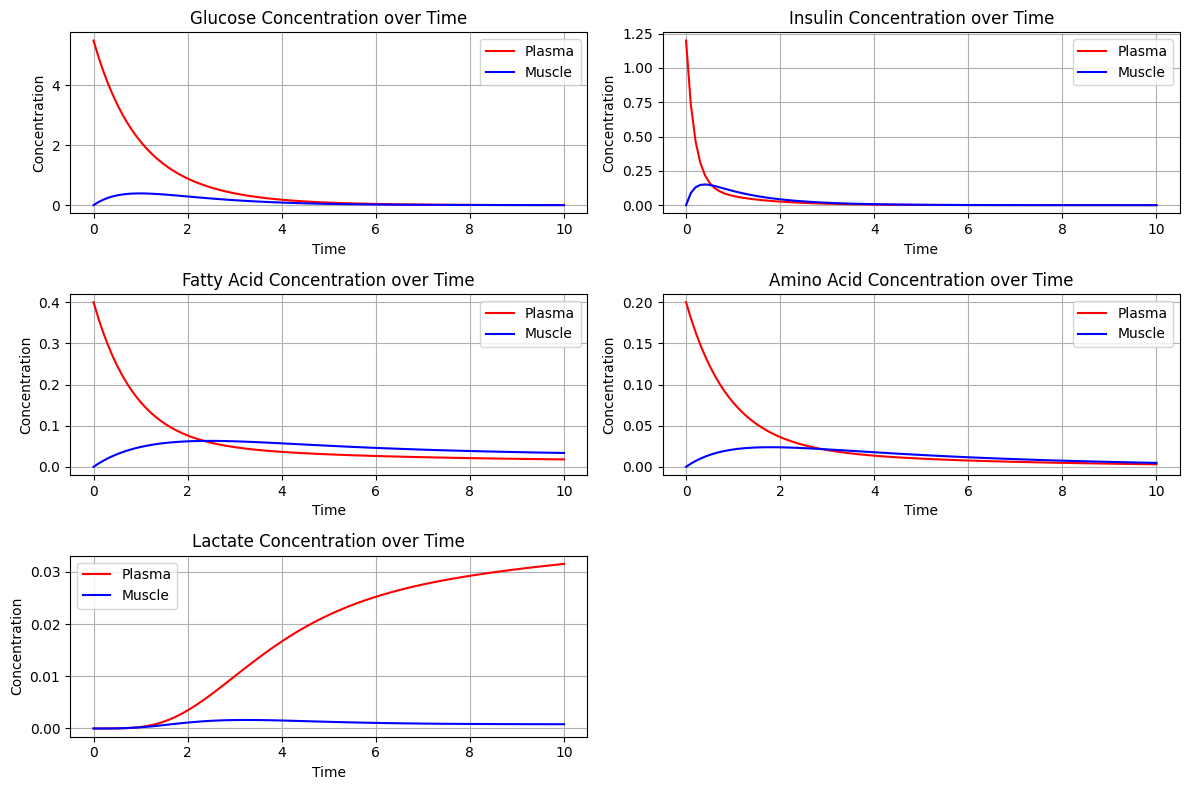

In [6]:
n = len(Index)
y0 = np.zeros(n)
y0[Index.plasma_glucose] = 5.5 #gmmol
y0[Index.plasma_insulin] = 1.2 #g/L
y0[Index.plasma_fattyacid] = 0.4 #mmol/L
y0[Index.plasma_aminoacid] = 0.2 #mmol/L

#https://link.springer.com/article/10.1007/s40279-022-01772-2
#average weight of person is around 60 kg,
# skeletal muscle is around 40% of weight
# NAD and NADH concentrations estimated to be around 1.6 mmol/kg and 0.15 mmol/kg muscle weight
#
# volume of skeletal muscle is ~25.0L
y0[Index.muscle_NAD] = 1.6*(60*.4)/25 #mmol/L 
y0[Index.muscle_NADH] = 0.15*(60*.4)/25 #mmol/L

#no certain data for FAD and FADH2, but assume its around 1/3 of NAD
y0[Index.muscle_FAD] = 1.6*(60*.4)/25/3
y0[Index.muscle_FADH2] = 0.15*(60*.4)/25/3

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)


solution = solve_ivp(fun=lambda t, y: skeletalmuscle(t, y, p),
                     t_span=t_span,
                     y0=y0,
                     t_eval=t_eval,
                     method='LSODA')

timespan = solution.t   
glucoseplasma = solution.y[Index.plasma_glucose]
glucosemuscle = solution.y[Index.muscle_glucose]
glycogen = solution.y[Index.muscle_glycogen]

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(timespan, glucoseplasma, label='Plasma', color='red')
plt.plot(timespan, glucosemuscle, label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Glucose Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(timespan, solution.y[Index.plasma_insulin], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.muscle_insulin], label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Insulin Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(timespan, solution.y[Index.plasma_fattyacid], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.muscle_fattyacid], label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Fatty Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(timespan, solution.y[Index.plasma_aminoacid], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.muscle_aminoacid], label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Amino Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(timespan, solution.y[Index.plasma_lactate], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.muscle_lactate], label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Lactate Concentration over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

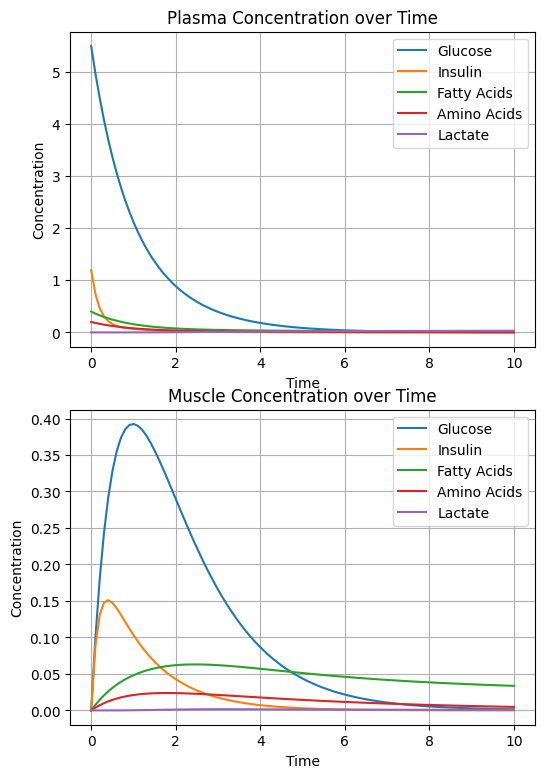

In [7]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[Index.plasma_glucose], label='Glucose')
plt.plot(timespan, solution.y[Index.plasma_insulin], label='Insulin')
plt.plot(timespan, solution.y[Index.plasma_fattyacid], label='Fatty Acids')
plt.plot(timespan, solution.y[Index.plasma_aminoacid], label='Amino Acids')
plt.plot(timespan, solution.y[Index.plasma_lactate], label='Lactate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Plasma Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(timespan, solution.y[Index.muscle_glucose], label='Glucose')
plt.plot(timespan, solution.y[Index.muscle_insulin], label='Insulin')
plt.plot(timespan, solution.y[Index.muscle_fattyacid], label='Fatty Acids')
plt.plot(timespan, solution.y[Index.muscle_aminoacid], label='Amino Acids')
plt.plot(timespan, solution.y[Index.muscle_lactate], label='Lactate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

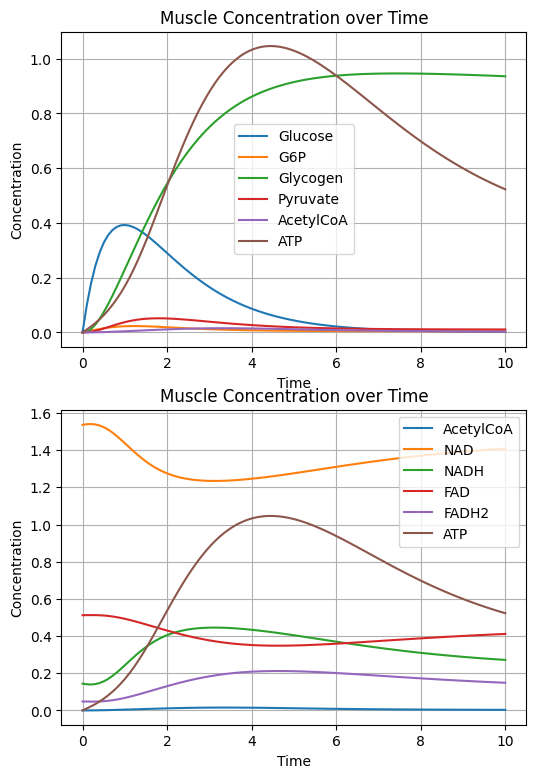

In [8]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[Index.muscle_glucose], label='Glucose')
plt.plot(timespan, solution.y[Index.muscle_G6P], label='G6P')
plt.plot(timespan, solution.y[Index.muscle_glycogen], label='Glycogen')
plt.plot(timespan, solution.y[Index.muscle_pyruvate], label='Pyruvate')
plt.plot(timespan, solution.y[Index.muscle_ACoA], label='AcetylCoA')
plt.plot(timespan, solution.y[Index.muscle_ATP], label='ATP')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(timespan, solution.y[Index.muscle_ACoA], label='AcetylCoA')
plt.plot(timespan, solution.y[Index.muscle_NAD], label='NAD')
plt.plot(timespan, solution.y[Index.muscle_NADH], label='NADH')
plt.plot(timespan, solution.y[Index.muscle_FAD], label='FAD')
plt.plot(timespan, solution.y[Index.muscle_FADH2], label='FADH2')
plt.plot(timespan, solution.y[Index.muscle_ATP], label='ATP')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

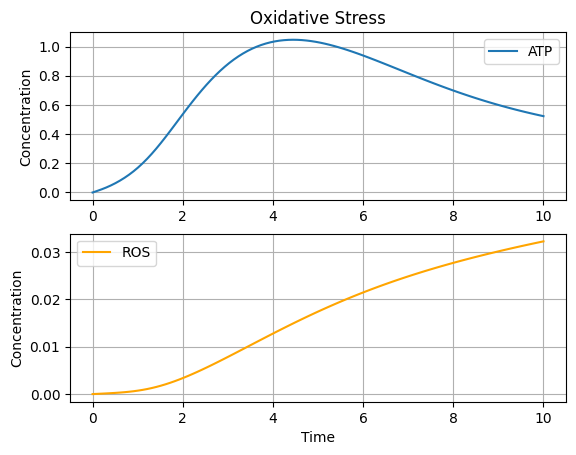

In [9]:
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[Index.muscle_ATP], label='ATP')


plt.ylabel('Concentration')
plt.title('Oxidative Stress')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)

plt.plot(timespan, solution.y[Index.muscle_ROS], label='ROS', color='orange')
plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.grid(True)